In [ ]:
#Student names: (2 person team) 

#Patrick Manacorda
#Tuan Phan

In [1]:
# you need   Python ≥3.5 
import sys
assert sys.version_info >= (3, 5)
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"
from sklearn.tree import DecisionTreeClassifier

import pandas as pd   
import numpy as np    
import matplotlib.pyplot as plt 
import seaborn as sns
import time
import warnings
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings("ignore")
##############################################
df2 = pd.read_csv('TSLA.csv')
index = 0
priceChangeList = []
for openPrice in df2["Open"]:
    changeAmount = df2["Close"][index] - openPrice # close: 909, open: 900, change: 18, change%: 2
    changePercentage = changeAmount / (openPrice/100) # change% = change / (openPrice/100)
    priceChangeList.append(changePercentage)
    index = index + 1

df = df2.assign(Change = priceChangeList)
# Data spans over the course of 1 year: from May 2020 to May 2021
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Change
0,2020-05-11,158.102005,164.800003,157.000000,162.257996,162.257996,82598000,2.628677
1,2020-05-12,165.399994,168.658005,161.600006,161.882004,161.882004,79534500,-2.126959
2,2020-05-13,164.166000,165.199997,152.660004,158.192001,158.192001,95327500,-3.638999
3,2020-05-14,156.000000,160.671997,152.800003,160.666000,160.666000,68411000,2.991026
4,2020-05-15,158.070007,161.009995,157.309998,159.834000,159.834000,52592000,1.115957


In [2]:
#(a) The mean, median, and standard deviation
df.describe()

,Open,High,Low,Close,Adj Close,Volume,Change
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,503.027311,514.975151,489.108564,503.133292,503.133292,5.204099e+07,0.128894
std,214.366214,218.045078,209.366302,214.043429,214.043429,2.911244e+07,3.663739
min,156.000000,160.671997,152.660004,158.192001,158.192001,1.515770e+07,-9.879983
25%,321.600006,330.176994,297.900002,312.991997,312.991997,3.125360e+07,-2.247009
50%,448.145004,458.455002,435.955002,447.559998,447.559998,4.326375e+07,-0.118290
75%,686.025009,701.087509,667.970016,682.614975,682.614975,6.728720e+07,2.240090
max,891.380005,900.400024,871.599976,883.090027,883.090027,2.221262e+08,12.080255


<AxesSubplot:>

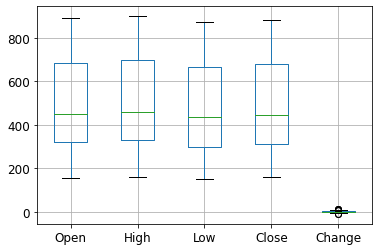

In [3]:
#(b) Draw boxplots of attributes in one frame.

%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

labels = ['Open', 'High', 'Low', 'Close', 'Change']
df[labels].boxplot()

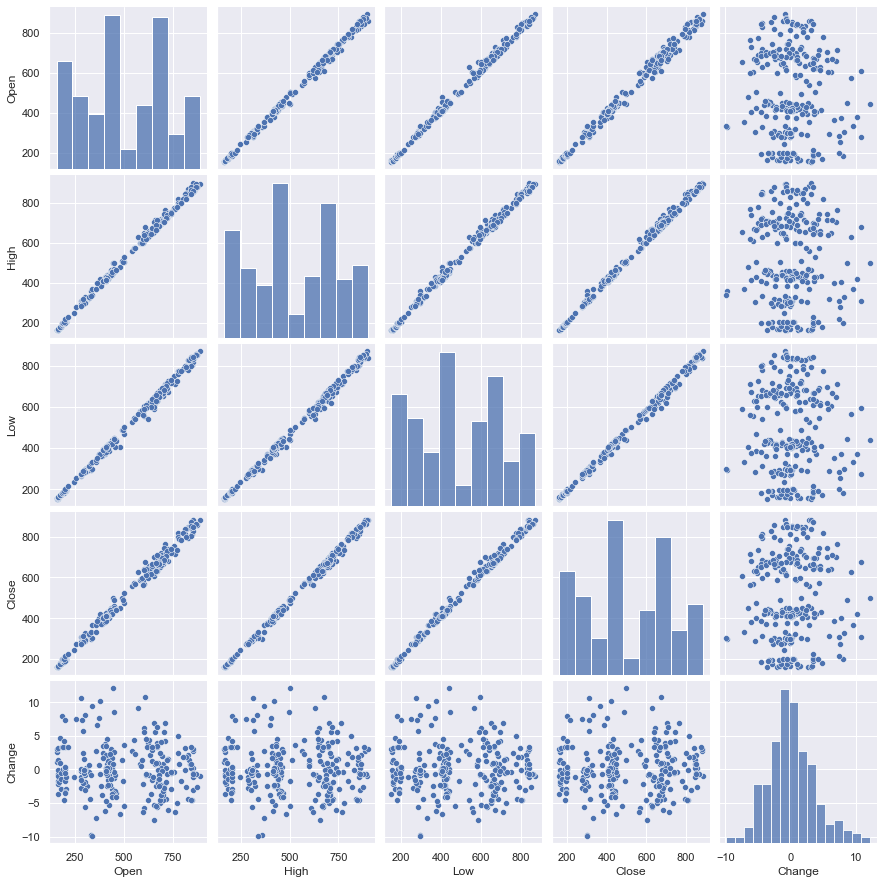

In [4]:
#(c) Draw pairplots.  
import seaborn as sns

sns.set()
sns.pairplot(df[labels])

In [5]:
#(d) If the scatter plot shows a correlation among variables, then calculate the correlation.  We can use the following command for this purpose.
# calculate Pearson's correlation
from scipy.stats import pearsonr
# calculate Pearson's correlation between price and longitude 
print('Pearsons correlation between Open and High:', pearsonr(df['Open'], df['High'])[0])
print('Pearsons correlation between Open and Low:', pearsonr(df['Open'], df['Low'])[0])
print('Pearsons correlation between Open and Close:', pearsonr(df['Open'], df['Close'])[0])

Pearsons correlation between Open and High: 0.9984590566511321
Pearsons correlation between Open and Low: 0.9980352528284361
Pearsons correlation between Open and Close: 0.996087525164833


In [6]:
from sklearn.model_selection import train_test_split
# split the data into train and test parts
train_df, test_df = train_test_split(df,shuffle = True, test_size = 0.95, random_state=17)

R2 Score: 
0.00046287111800624725


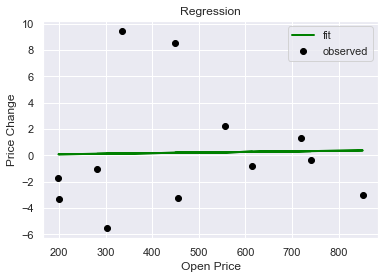

In [7]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

X= train_df['Open']
y = train_df['Change']
X2= np.array(X).reshape(-1,1) # reshape(-1,1) makes the array horizontal, y is vertical

# Train the model (we use all data for training --> 
model = sklearn.linear_model.LinearRegression()
model.fit(X2, y)
r_sq = model.score(X2, y)
print("R2 Score: ")
print(r_sq)
plt.scatter(X2, y, color='black', label='observed')

plt.plot(X2, model.predict(X2), label='fit', color='Green', linewidth=2)

plt.xlabel('Open Price')
plt.ylabel('Price Change')
plt.title('Regression')
plt.legend(loc='best')

plt.show()



In [8]:
X3= test_df['Open']
X3= np.array(X3).reshape(-1,1)
index = 0
for price in df["Open"]:
    predicted_change = model.predict([[price]]) #X3[2]
    print('Open = {:.2f}   predicted Close price/actual = {:.2f} / {:.2f}'.format(price, price + predicted_change[0], df["Close"][index]))
    index = index + 1
    if index == 15:
        break

Open = 158.10   predicted Close price/actual = 158.15 / 162.26
Open = 165.40   predicted Close price/actual = 165.46 / 161.88
Open = 164.17   predicted Close price/actual = 164.22 / 158.19
Open = 156.00   predicted Close price/actual = 156.05 / 160.67
Open = 158.07   predicted Close price/actual = 158.12 / 159.83
Open = 165.56   predicted Close price/actual = 165.61 / 162.73
Open = 163.03   predicted Close price/actual = 163.09 / 161.60
Open = 164.10   predicted Close price/actual = 164.16 / 163.11
Open = 163.20   predicted Close price/actual = 163.26 / 165.52
Open = 164.43   predicted Close price/actual = 164.49 / 163.38
Open = 166.90   predicted Close price/actual = 166.96 / 163.77
Open = 164.17   predicted Close price/actual = 164.23 / 164.05
Open = 162.70   predicted Close price/actual = 162.76 / 161.16
Open = 161.75   predicted Close price/actual = 161.80 / 167.00
Open = 171.60   predicted Close price/actual = 171.66 / 179.62


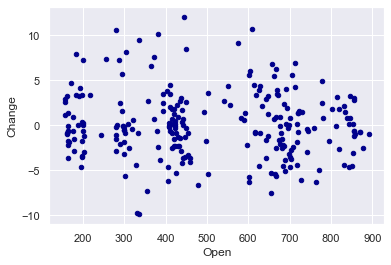

In [9]:
ax1 = df.plot.scatter(x='Open', y='Change', c='DarkBlue')
plt.show()

In [10]:
#Conclusions for Part 3:

# We can see from the pair plots that the price change between open and close doesn't have a correlation with
# any of the other variables {Open Price, Close Price, Low Price, High Price}.
# The originally high correlation between open and close price shown in part 2 is due to the fact 
# that the price for the stock increases over time, yielding to a 0.99 correlation between the variables.
# However, it does not give a realistic estimate for the closing price simply given the opening price, as the prediction
# always estimates a positive increase in the stock price.


# Moving forward, we would like to explore the possibility of correlation between price change and some other market factor
# that can show some more promise in predicting the close price, given the open price for the day.
# For example, we could account for the daily moving average and try to correlate that value with the price change
# to see if we get better results.


In [11]:
# part 4

import pandas_datareader.data as web
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA 

# define instruments to download
companies_dict = {
 'Amazon': 'AMZN',
 'Apple': 'AAPL',
 'Tesla': 'TSLA',
 'MasterCard': 'MA',
 'Microsoft': 'MSFT',
 'Ford': 'F',
 'Honda': 'HMC',
 'Toyota':'TM',
 'Intel': 'INTC',
 'IBM': 'IBM', 
 'General Electric': 'GE',
 'American Express': 'AXP',
 'Pepsi': 'PEP',
 'Coca Cola': 'KO',
 'Exxon': 'XOM',
 'Chevron': 'CVX',
 'Valero Energy': 'VLO',
 'Bank of America': 'BAC',
 'B&G Foods, Inc.': 'BGS',
 'Kellogg': 'K',
 'General Motors': 'GM',
 'CIT Group Inc': 'CIT',
 'Wells Fargo & Co.': 'WFC',
 'JPMorgan Chase & Co.': 'JPM'    
}

companies = sorted(companies_dict.items(), key=lambda x: x[1])

# Define which online source to use
data_source = 'yahoo'

# define start and end dates
start_date = '2020-05-21'
end_date = '2021-05-21'

# Use pandas_datareader.data.DataReader to load the desired data list(companies_dict.values()) used for python 3 compatibility
panel_data = web.DataReader(list(companies_dict.values()), data_source, start_date, end_date)

print(panel_data.axes)

[DatetimeIndex(['2020-05-21', '2020-05-22', '2020-05-26', '2020-05-27',
               '2020-05-28', '2020-05-29', '2020-06-01', '2020-06-02',
               '2020-06-03', '2020-06-04',
               ...
               '2021-05-10', '2021-05-11', '2021-05-12', '2021-05-13',
               '2021-05-14', '2021-05-17', '2021-05-18', '2021-05-19',
               '2021-05-20', '2021-05-21'],
              dtype='datetime64[ns]', name='Date', length=253, freq=None), MultiIndex([('Adj Close', 'AMZN'),
            ('Adj Close', 'AAPL'),
            ('Adj Close', 'TSLA'),
            ('Adj Close',   'MA'),
            ('Adj Close', 'MSFT'),
            ('Adj Close',    'F'),
            ('Adj Close',  'HMC'),
            ('Adj Close',   'TM'),
            ('Adj Close', 'INTC'),
            ('Adj Close',  'IBM'),
            ...
            (   'Volume',  'XOM'),
            (   'Volume',  'CVX'),
            (   'Volume',  'VLO'),
            (   'Volume',  'BAC'),
            (   'Volume',  '

In [12]:
stock_close = panel_data['Close']
stock_open = panel_data['Open']

print(stock_close.iloc[0])

Symbols
AMZN    2446.739990
AAPL      79.212502
TSLA     165.520004
MA       294.260010
MSFT     183.429993
F          5.630000
HMC       23.730000
TM       117.949997
INTC      61.980000
IBM      119.120003
GE         6.480000
AXP       89.830002
PEP      130.210007
KO        45.169998
XOM       44.560001
CVX       92.040001
VLO       65.730003
BAC       22.900000
BGS       22.090000
K         61.369999
GM        25.799999
CIT       16.809999
WFC       24.459999
JPM       90.169998
Name: 2020-05-21 00:00:00, dtype: float64


In [13]:
import pandas as pd
import numpy as np
import datetime

# Calculate daily stock movement
stock_close = np.array(stock_close).T
stock_open = np.array(stock_open).T

row, col = stock_close.shape

# create movements dataset filled with 0's
movements = np.zeros([row, col])

for i in range(0, row):
 movements[i,:] = np.subtract(stock_close[i,:], stock_open[i,:])

for i in range(0, len(companies)):
 print('Company: {}, Change: {}'.format(companies[i][0], sum(movements[i][:])))


Company: Apple, Change: -1107.302734375
Company: Amazon, Change: -20.782615661621094
Company: American Express, Change: 31.313552856445312
Company: Bank of America, Change: -81.339599609375
Company: B&G Foods, Inc., Change: 30.23992919921875
Company: CIT Group Inc, Change: 0.4499950408935547
Company: Chevron, Change: 4.590007781982422
Company: Ford, Change: -14.680038452148438
Company: General Electric, Change: -5.230007171630859
Company: General Motors, Change: 3.2499618530273438
Company: Honda, Change: -1.6599946022033691
Company: IBM, Change: 22.02001953125
Company: Intel, Change: -2.7600555419921875
Company: JPMorgan Chase & Co., Change: -7.5200042724609375
Company: Kellogg, Change: 2.1800079345703125
Company: Coca Cola, Change: -10.320030212402344
Company: MasterCard, Change: -6.599987030029297
Company: Microsoft, Change: 5.19001579284668
Company: Pepsi, Change: -7.270015716552734
Company: Toyota, Change: -4.570060729980469
Company: Tesla, Change: 2.6099853515625
Company: Valero E

In [14]:
# import Normalizer
from sklearn.preprocessing import Normalizer
# create the Normalizer
normalizer = Normalizer()

new = normalizer.fit_transform(movements)

In [15]:
# import machine learning libraries
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans

# define normalizer
normalizer = Normalizer()

# create a K-means model with 10 clusters
kmeans = KMeans(n_clusters=10, max_iter=1000)

# make a pipeline chaining normalizer and kmeans
pipeline = make_pipeline(normalizer,kmeans)

# fit pipeline to daily stock movements
pipeline.fit(movements)

Pipeline(steps=[('normalizer', Normalizer()),
                ('kmeans', KMeans(max_iter=1000, n_clusters=10))])

In [16]:
# predict cluster labels
labels = pipeline.predict(movements)

# create a DataFrame aligning labels & companies
df = pd.DataFrame({'labels': labels, 'companies': companies})

# display df sorted by cluster labels
print(df.sort_values('labels'))

    labels                    companies
11       0                   (IBM, IBM)
21       0         (Valero Energy, VLO)
17       0            (Microsoft, MSFT)
22       0     (Wells Fargo & Co., WFC)
10       0                 (Honda, HMC)
23       0                 (Exxon, XOM)
0        1                (Apple, AAPL)
1        1               (Amazon, AMZN)
4        1       (B&G Foods, Inc., BGS)
19       2                 (Toyota, TM)
12       2                (Intel, INTC)
13       2  (JPMorgan Chase & Co., JPM)
20       3                (Tesla, TSLA)
5        3         (CIT Group Inc, CIT)
3        4       (Bank of America, BAC)
2        5      (American Express, AXP)
14       6                 (Kellogg, K)
15       6              (Coca Cola, KO)
16       6             (MasterCard, MA)
9        7         (General Motors, GM)
7        7                    (Ford, F)
6        7               (Chevron, CVX)
18       8                 (Pepsi, PEP)
8        9       (General Electric, GE)


In [17]:
# PCA
from sklearn.decomposition import PCA 

# visualize the results
reduced_data = PCA(n_components = 2).fit_transform(new)

# run kmeans on reduced data
kmeans = KMeans(n_clusters=10)
kmeans.fit(reduced_data)
labels = kmeans.predict(reduced_data)

# create DataFrame aligning labels & companies
df = pd.DataFrame({'labels': labels, 'companies': companies})

# Display df sorted by cluster labels
print(df.sort_values('labels'))

    labels                    companies
11       0                   (IBM, IBM)
21       0         (Valero Energy, VLO)
17       0            (Microsoft, MSFT)
22       0     (Wells Fargo & Co., WFC)
10       0                 (Honda, HMC)
23       0                 (Exxon, XOM)
0        1                (Apple, AAPL)
1        1               (Amazon, AMZN)
4        1       (B&G Foods, Inc., BGS)
13       2  (JPMorgan Chase & Co., JPM)
8        3       (General Electric, GE)
3        3       (Bank of America, BAC)
20       4                (Tesla, TSLA)
5        4         (CIT Group Inc, CIT)
2        5      (American Express, AXP)
6        6               (Chevron, CVX)
7        6                    (Ford, F)
12       7                (Intel, INTC)
18       7                 (Pepsi, PEP)
19       7                 (Toyota, TM)
16       8             (MasterCard, MA)
15       8              (Coca Cola, KO)
14       8                 (Kellogg, K)
9        9         (General Motors, GM)


<Figure size 432x288 with 0 Axes>

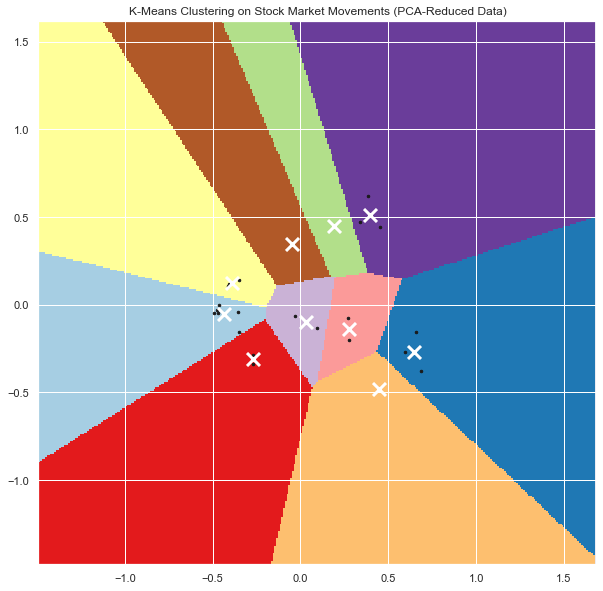

In [18]:
from matplotlib import pyplot as plt

# Define step size of mesh
h = 0.01

# plot the decision boundary
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:,0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain abels for each point in the mesh using our trained model
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

# define colorplot
cmap = plt.cm.Paired

# plot figure
plt.clf()
plt.figure(figsize=(10,10))
plt.imshow(Z, interpolation='nearest',
 extent = (xx.min(), xx.max(), yy.min(), yy.max()),
 cmap = cmap,
 aspect = 'auto', origin='lower')
plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=5)


# plot the centroid of each cluster as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
 marker='x', s=169, linewidth=3,
 color='w', zorder=10)

plt.title('K-Means Clustering on Stock Market Movements (PCA-Reduced Data)')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

#Source: https://www.mlq.ai/stock-market-clustering-with-k-means/

In [19]:
# classify the dataset using at least three classification methods

# Support Vector Machine.

def plot_class_regions_for_classifier_subplot(clf, X, y, X_test, y_test, title, subplot, target_names = None, plot_decision_regions = True):

    numClasses = np.amax(y) + 1
    color_list_light = ['#FFFFAA', '#EFEFEF', '#AAFFAA', '#AAAAFF']
    color_list_bold = ['#EEEE00', '#000000', '#00CC00', '#0000CC']
    cmap_light = ListedColormap(color_list_light[0:numClasses])
    cmap_bold  = ListedColormap(color_list_bold[0:numClasses])

    h = 0.03
    k = 0.5
    x_plot_adjust = 0.1
    y_plot_adjust = 0.1
    plot_symbol_size = 50

    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    x2, y2 = np.meshgrid(np.arange(x_min-k, x_max+k, h), np.arange(y_min-k, y_max+k, h))

    P = clf.predict(np.c_[x2.ravel(), y2.ravel()])
    P = P.reshape(x2.shape)

    if plot_decision_regions:
        subplot.contourf(x2, y2, P, cmap=cmap_light, alpha = 0.8)

    subplot.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=plot_symbol_size, edgecolor = 'black')
    subplot.set_xlim(x_min - x_plot_adjust, x_max + x_plot_adjust)
    subplot.set_ylim(y_min - y_plot_adjust, y_max + y_plot_adjust)

    if (X_test is not None):
        subplot.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, s=plot_symbol_size, marker='^', edgecolor = 'black')
        train_score = clf.score(X, y)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)

    subplot.set_title(title)

    if (target_names is not None):
        legend_handles = []
        for i in range(0, len(target_names)):
            patch = mpatches.Patch(color=color_list_bold[i], label=target_names[i])
            legend_handles.append(patch)
        subplot.legend(loc=0, handles=legend_handles)


def plot_class_regions_for_classifier(clf, X, y, X_test=None, y_test=None, title=None, target_names = None, plot_decision_regions = True):

    numClasses = np.amax(y) + 1
    color_list_light = ['#FFFFAA', '#EFEFEF', '#AAFFAA', '#AAAAFF']
    color_list_bold = ['#EEEE00', '#000000', '#00CC00', '#0000CC']
    cmap_light = ListedColormap(color_list_light[0:numClasses])
    cmap_bold  = ListedColormap(color_list_bold[0:numClasses])

    h = 0.03
    k = 0.5
    x_plot_adjust = 0.1
    y_plot_adjust = 0.1
    plot_symbol_size = 50

    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    x2, y2 = np.meshgrid(np.arange(x_min-k, x_max+k, h), np.arange(y_min-k, y_max+k, h))

    P = clf.predict(np.c_[x2.ravel(), y2.ravel()])
    P = P.reshape(x2.shape)
    plt.figure()
    if plot_decision_regions:
        plt.contourf(x2, y2, P, cmap=cmap_light, alpha = 0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=plot_symbol_size, edgecolor = 'black')
    plt.xlim(x_min - x_plot_adjust, x_max + x_plot_adjust)
    plt.ylim(y_min - y_plot_adjust, y_max + y_plot_adjust)

    if (X_test is not None):
        plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, s=plot_symbol_size, marker='^', edgecolor = 'black')
        train_score = clf.score(X, y)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)

    if (target_names is not None):
        legend_handles = []
        for i in range(0, len(target_names)):
            patch = mpatches.Patch(color=color_list_bold[i], label=target_names[i])
            legend_handles.append(patch)
        plt.legend(loc=0, handles=legend_handles)

    if (title is not None):
        plt.title(title)
    plt.show()

In [65]:
import pandas as pd
import sklearn as sk
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])

TSLA = pd.read_csv('TSLA.csv', sep=',',header=0)

index = 0
priceChangeList = []
for openPrice in TSLA["Open"]:
    changeAmount = TSLA["Close"][index] - openPrice # close: 909, open: 900, change: 18, change%: 2
    changePercentage = changeAmount / (openPrice/100) # change% = change / (openPrice/100)
    priceChangeList.append(changePercentage)
    index = index + 1

TSLA = TSLA.assign(Change = priceChangeList)


X = TSLA.drop(["Date","High","Low","Adj Close","Volume", "Change"],axis=1)
y = []
for changePrice in TSLA["Change"]:
        if changePrice > 0:
            y.append(1)
        else:
            y.append(0)

X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)

logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

prediction = logreg.predict(X_test)

print(classification_report(y_test,prediction))

#Source: https://stackabuse.com/classification-in-python-with-scikit-learn-and-pandas
#Source: https://medium.com/analytics-vidhya/logistic-regression-in-python-using-pandas-and-seaborn-for-beginners-in-ml-64eaf0f208d2

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       1.00      1.00      1.00        37

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [ ]:
#Conclusion:

# We clustered different companies listed in the stock market
# to see if they would be grouped together according to their area of operation. We wanted to see If TSLA would be classified
# in the same cluster as other Automobile companies. In order to achieve this, we calculated the mean price change over the
# course of one year for all the companies we had listed. 
# We normalized the data and used K-means with 10 clusters for classification.
# The results varied based on the number of clusters we decided to use, however we concluded that there was
# not enough correlation to place TSLA stricly in the same cluster as other automotive companies.